In [2]:
# Imports and plotting setups
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import math

import sys, os
sys.path.insert(0, '../../')
sys.path.insert(0, '../')

import math_funcs

from cycler import cycler

default_cycler = (cycler(color=['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', 'black']) +
                cycler(linestyle=['-', '--', ':', '-.', '-', '--', ':']))

plt.rc('lines', linewidth=1)
plt.rc('axes', prop_cycle=default_cycler)

plt.rcParams["font.family"] = "Times"
plt.rcParams["font.size"] = 8

plt.rcParams['figure.figsize'] = (3.5, 2.5)
plt.rcParams['figure.dpi'] = 200

plt.rcParams['text.usetex'] = True

from scipy.constants import (
    epsilon_0,   # Permittivity of free space (vacuum)
    mu_0,        # Permeability of free space (vacuum)
    c,           # Speed of light in vacuum
    #e,           # Elementary charge
    #h,           # Planck constant
    #hbar,        # Reduced Planck constant (h-bar)
    k,           # Boltzmann constant
    #G,           # Newtonian constant of gravitation
    #m_e,         # Electron mass
    #m_p,         # Proton mass
    #m_n,         # Neutron mass
    #alpha,       # Fine-structure constant
    eV,          # Electron volt
)

# Example usage of some constants
print(f"Permittivity of free space: {epsilon_0} F/m")
print(f"Permeability of free space: {mu_0} N/A^2")
print(f"Speed of light in vacuum: {c} m/s")
# print(f"Elementary charge: {e} C")
# print(f"Planck constant: {h} J·s")
# print(f"Reduced Planck constant: {hbar} J·s")
print(f"Boltzmann constant: {k} J/K")
# print(f"Newtonian constant of gravitation: {G} m^3/kg/s^2")
# print(f"Electron mass: {m_e} kg")
# print(f"Proton mass: {m_p} kg")
# print(f"Neutron mass: {m_n} kg")
# print(f"Fine-structure constant: {alpha}")
print(f"Electron volt: {eV} J")

def print_engineering_notation(value):
    """
    Print a value in engineering notation (powers of ten in multiples of 3).

    Parameters:
    value (float): The value to be printed in engineering notation.
    """
    
    if value == 0:
        print("0")
        return

    exponent = int(math.floor(math.log10(abs(value)) / 3) * 3)
    mantissa = value / (10 ** exponent)
    
    print(f"{mantissa:.3f}e{exponent}")

# Example usage
print_engineering_notation(0)          # Output: 0
print_engineering_notation(1234.56)    # Output: 1.235e3
print_engineering_notation(0.00123456) # Output: 1.235e-3
print_engineering_notation(-987654)    # Output: -987.654e3
print_engineering_notation(1e9)        # Output: 1.000e9

from pucks_to_penetrate_cryosphere import calc_path_loss

from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D

Permittivity of free space: 8.8541878128e-12 F/m
Permeability of free space: 1.25663706212e-06 N/A^2
Speed of light in vacuum: 299792458.0 m/s
Boltzmann constant: 1.380649e-23 J/K
Electron volt: 1.602176634e-19 J
0
1.235e3
1.235e-3
-987.654e3
1.000e9


In [148]:
folder = '2025-01-28_10-57-01/' #'2025-01-27_15-52-25/'

lb_sj_rho_salt0_df = pd.read_csv(folder + 'puck_placements_low_band_sub jovian point10000p0_txpwr1_porosity0p1_saltfraction0p0e+00.csv')
lb_sj_rho_salt1e6_df = pd.read_csv(folder + 'puck_placements_low_band_sub jovian point10000p0_txpwr1_porosity0p1_saltfraction1p0e-06.csv')
lb_sj_rho_salt1e5_df = pd.read_csv(folder + 'puck_placements_low_band_sub jovian point10000p0_txpwr1_porosity0p1_saltfraction1p0e-05.csv')
lb_sj_rho_salt1e4_df = pd.read_csv(folder + 'puck_placements_low_band_sub jovian point10000p0_txpwr1_porosity0p1_saltfraction1p0e-04.csv')
lb_sj_rho_salt1e3_df = pd.read_csv(folder + 'puck_placements_low_band_sub jovian point10000p0_txpwr1_porosity0p1_saltfraction1p0e-03.csv')
lb_sj_rho_salt4p2e2_df = pd.read_csv(folder + 'puck_placements_low_band_sub jovian point10000p0_txpwr1_porosity0p1_saltfraction4p2e-02.csv')

hb_sj_rho_salt0_df = pd.read_csv(folder + 'puck_placements_high_band_sub jovian point10000p0_txpwr1_porosity0p1_saltfraction0p0e+00.csv')
hb_sj_rho_salt1e6_df = pd.read_csv(folder + 'puck_placements_high_band_sub jovian point10000p0_txpwr1_porosity0p1_saltfraction1p0e-06.csv')
hb_sj_rho_salt1e5_df = pd.read_csv(folder + 'puck_placements_high_band_sub jovian point10000p0_txpwr1_porosity0p1_saltfraction1p0e-05.csv')
hb_sj_rho_salt1e4_df = pd.read_csv(folder + 'puck_placements_high_band_sub jovian point10000p0_txpwr1_porosity0p1_saltfraction1p0e-04.csv')
hb_sj_rho_salt1e3_df = pd.read_csv(folder + 'puck_placements_high_band_sub jovian point10000p0_txpwr1_porosity0p1_saltfraction1p0e-03.csv')
hb_sj_rho_salt4p2e2_df = pd.read_csv(folder + 'puck_placements_high_band_sub jovian point10000p0_txpwr1_porosity0p1_saltfraction4p2e-02.csv')

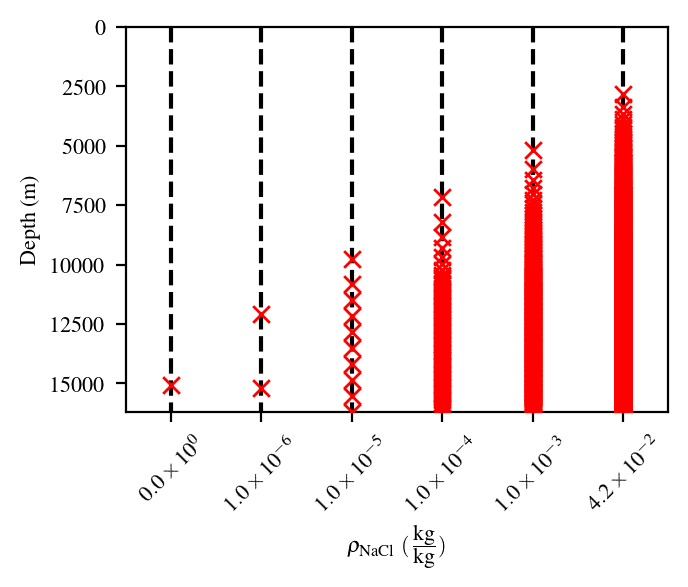

In [149]:
# Data from the dataset
max_depth = 16200  # Maximum value for the vertical line

# Create the plot
fig = plt.figure(figsize=(3.5,2.5))

dfs = [
    lb_sj_rho_salt0_df,
    lb_sj_rho_salt1e6_df,
    lb_sj_rho_salt1e5_df,
    lb_sj_rho_salt1e4_df,
    lb_sj_rho_salt1e3_df,
    lb_sj_rho_salt4p2e2_df]
labels = [
    r'$0.0\times10^{0}$',  
    r'$1.0\times10^{-6}$', 
    r'$1.0\times10^{-5}$', 
    r'$1.0\times10^{-4}$', 
    r'$1.0\times10^{-3}$', 
    r'$4.2\times10^{-2}$']

i = 0
for label, df in zip(labels, dfs):
    i += 1
    depths = df['Placement Depth (m)'][1:-1]
    # Plot the first line and points
    plt.plot([i, i], [0, max_depth], color='black', linestyle='--', linewidth=1.5, label=label)
    plt.scatter([i] * len(depths), depths, color='red', label="Depth Points Line 1", zorder=5, marker='x')

# Customize the plot
plt.ylim(max_depth, 0)
plt.xlim(0.5, len(labels)+0.5)
plt.xticks(np.arange(len(labels))+1.0, labels, rotation=45)
plt.ylabel('Depth (m)')
plt.xlabel(r'$\rho_{\rm{NaCl}}$ $(\frac{\textrm{kg}}{\textrm{kg}})$')

# Show the plot
plt.show()

In [5]:
# Plot as a cumulative distribution
df.index

RangeIndex(start=0, stop=894, step=1)

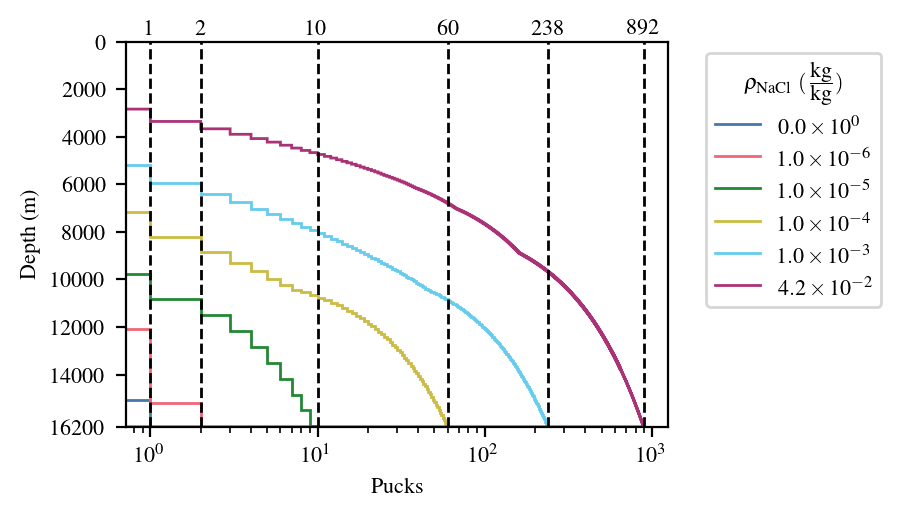

In [150]:
# Data from the dataset
max_depth = 16200  # Maximum value for the vertical line

# Create the plot
fig = plt.figure(figsize=(3.5,2.5))

dfs = [
    lb_sj_rho_salt0_df,
    lb_sj_rho_salt1e6_df,
    lb_sj_rho_salt1e5_df,
    lb_sj_rho_salt1e4_df,
    lb_sj_rho_salt1e3_df,
    lb_sj_rho_salt4p2e2_df]
labels = [
    r'$0.0\times10^{0}$',  
    r'$1.0\times10^{-6}$', 
    r'$1.0\times10^{-5}$', 
    r'$1.0\times10^{-4}$', 
    r'$1.0\times10^{-3}$', 
    r'$4.2\times10^{-2}$']

i = 0
# previous_y = 0
for label, df, color, pattern, label in zip(labels, dfs, 
    ['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', 'black'], 
    ['-', '--', ':', '-.', '-', '--', ':'], labels):

    depths = df['Placement Depth (m)']
    plt.stairs(df.index[:-1], depths, label=label, 
        orientation='horizontal', color=color, linestyle='-')
    plt.axvline(x=df.index[-2], color='black', linestyle='--')
    plt.text(df.index[-2], -100, f'{df.index[-2]}', color='black', 
             va='bottom', ha='center', fontsize=8)
    i += 1

plt.ylabel('Depth (m)')
plt.ylim(max_depth, 0)

yticks_to_set_on_df = [0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.,
        14000., 16200.]
# yticks_to_set_on_maxdf = [0.,  5000., 10000., 15000., 
#         20000., 25000., 28300.]
plt.yticks(yticks_to_set_on_df)


plt.xscale('log')
plt.xlabel('Pucks')
plt.legend(title=r'$\rho_{\rm{NaCl}}$ $(\frac{\textrm{kg}}{\textrm{kg}})$', bbox_to_anchor=(1.05, 1), loc='upper left')
# Show the plot
plt.show()

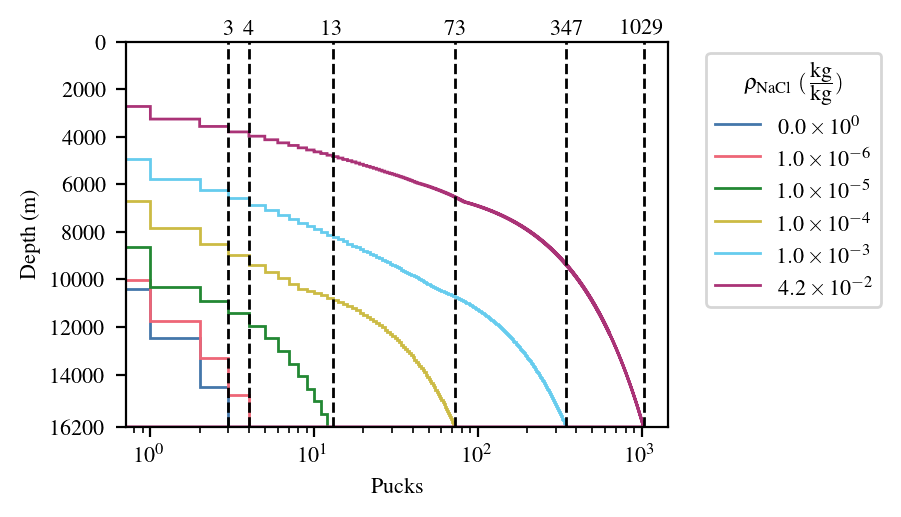

In [151]:
# Data from the dataset
max_depth = 16200  # Maximum value for the vertical line

# Create the plot
fig = plt.figure(figsize=(3.5,2.5))

dfs = [
    hb_sj_rho_salt0_df,
    hb_sj_rho_salt1e6_df,
    hb_sj_rho_salt1e5_df,
    hb_sj_rho_salt1e4_df,
    hb_sj_rho_salt1e3_df,
    hb_sj_rho_salt4p2e2_df]
labels = [
    r'$0.0\times10^{0}$',  
    r'$1.0\times10^{-6}$', 
    r'$1.0\times10^{-5}$', 
    r'$1.0\times10^{-4}$', 
    r'$1.0\times10^{-3}$', 
    r'$4.2\times10^{-2}$']

i = 0
# previous_y = 0
for label, df, color, pattern, label in zip(labels, dfs, 
    ['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', 'black'], 
    ['-', '--', ':', '-.', '-', '--', ':'], labels):

    depths = df['Placement Depth (m)']
    plt.stairs(df.index[:-1], depths, label=label, 
        orientation='horizontal', color=color, linestyle='-')
    plt.axvline(x=df.index[-2], color='black', linestyle='--')
    plt.text(df.index[-2], -100, f'{df.index[-2]}', color='black', 
             va='bottom', ha='center', fontsize=8)
    i += 1

plt.ylabel('Depth (m)')
plt.ylim(max_depth, 0)
yticks_to_set_on_df = [0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.,
        14000., 16200.]
# yticks_to_set_on_maxdf = [0.,  5000., 10000., 15000., 
#         20000., 25000., 28300.]
plt.yticks(yticks_to_set_on_df)

plt.xscale('log')
plt.xlabel('Pucks')
plt.legend(title=r'$\rho_{\rm{NaCl}}$ $(\frac{\textrm{kg}}{\textrm{kg}})$', bbox_to_anchor=(1.05, 1), loc='upper left')
# Show the plot
plt.show()

In [152]:
# Low Band
# TX power 10
lb_sj_rho_salt0_tx10_df = pd.read_csv(folder + 'puck_placements_low_band_sub jovian point10000p0_txpwr10_porosity0p1_saltfraction0p0e+00.csv')
lb_sj_rho_salt1e6_tx10_df = pd.read_csv(folder + 'puck_placements_low_band_sub jovian point10000p0_txpwr10_porosity0p1_saltfraction1p0e-06.csv')
lb_sj_rho_salt1e5_tx10_df = pd.read_csv(folder + 'puck_placements_low_band_sub jovian point10000p0_txpwr10_porosity0p1_saltfraction1p0e-05.csv')
lb_sj_rho_salt1e4_tx10_df = pd.read_csv(folder + 'puck_placements_low_band_sub jovian point10000p0_txpwr10_porosity0p1_saltfraction1p0e-04.csv')
lb_sj_rho_salt1e3_tx10_df = pd.read_csv(folder + 'puck_placements_low_band_sub jovian point10000p0_txpwr10_porosity0p1_saltfraction1p0e-03.csv')
lb_sj_rho_salt4p2e2_tx10_df = pd.read_csv(folder + 'puck_placements_low_band_sub jovian point10000p0_txpwr10_porosity0p1_saltfraction4p2e-02.csv')

# Anti Jovian landing
lb_aj_rho_salt0_df = pd.read_csv(folder + 'puck_placements_low_band_anti jovian point10000p0_txpwr1_porosity0p1_saltfraction0p0e+00.csv')
lb_aj_rho_salt1e6_df = pd.read_csv(folder + 'puck_placements_low_band_anti jovian point10000p0_txpwr1_porosity0p1_saltfraction1p0e-06.csv')
lb_aj_rho_salt1e5_df = pd.read_csv(folder + 'puck_placements_low_band_anti jovian point10000p0_txpwr1_porosity0p1_saltfraction1p0e-05.csv')
lb_aj_rho_salt1e4_df = pd.read_csv(folder + 'puck_placements_low_band_anti jovian point10000p0_txpwr1_porosity0p1_saltfraction1p0e-04.csv')
lb_aj_rho_salt1e3_df = pd.read_csv(folder + 'puck_placements_low_band_anti jovian point10000p0_txpwr1_porosity0p1_saltfraction1p0e-03.csv')
lb_aj_rho_salt4p2e2_df = pd.read_csv(folder + 'puck_placements_low_band_anti jovian point10000p0_txpwr1_porosity0p1_saltfraction4p2e-02.csv')

# Anti Orbital Landing
lb_ao_rho_salt0_df = pd.read_csv(folder + 'puck_placements_low_band_anti orbital point10000p0_txpwr1_porosity0p1_saltfraction0p0e+00.csv')
lb_ao_rho_salt1e6_df = pd.read_csv(folder + 'puck_placements_low_band_anti orbital point10000p0_txpwr1_porosity0p1_saltfraction1p0e-06.csv')
lb_ao_rho_salt1e5_df = pd.read_csv(folder + 'puck_placements_low_band_anti orbital point10000p0_txpwr1_porosity0p1_saltfraction1p0e-05.csv')
lb_ao_rho_salt1e4_df = pd.read_csv(folder + 'puck_placements_low_band_anti orbital point10000p0_txpwr1_porosity0p1_saltfraction1p0e-04.csv')
lb_ao_rho_salt1e3_df = pd.read_csv(folder + 'puck_placements_low_band_anti orbital point10000p0_txpwr1_porosity0p1_saltfraction1p0e-03.csv')
lb_ao_rho_salt4p2e2_df = pd.read_csv(folder + 'puck_placements_low_band_anti orbital point10000p0_txpwr1_porosity0p1_saltfraction4p2e-02.csv')

# Maximally Thick Europa
lb_sj_rho_salt0_thik_df = pd.read_csv(folder + 'puck_placements_low_band_sub jovian point10000p0_12100p0_12100p0_txpwr1_porosity0p1_saltfraction0p0e+00.csv')
lb_sj_rho_salt1e3_thik__df = pd.read_csv(folder + 'puck_placements_low_band_sub jovian point10000p0_12100p0_12100p0_txpwr1_porosity0p1_saltfraction1p0e-03.csv')
lb_sj_rho_salt4p2e_thik_2_df = pd.read_csv(folder + 'puck_placements_low_band_sub jovian point10000p0_12100p0_12100p0_txpwr1_porosity0p1_saltfraction4p2e-02.csv')

# Shannon Channel Capacity
lb_sj_rho_salt0_sc_df = pd.read_csv(folder + 'puck_placements_low_band_sub jovian point10000p0sc_txpwr1_porosity0p1_saltfraction0p0e+00.csv')
lb_sj_rho_salt1e6_sc_df = pd.read_csv(folder + 'puck_placements_low_band_sub jovian point10000p0sc_txpwr1_porosity0p1_saltfraction1p0e-06.csv')
lb_sj_rho_salt1e5_sc_df = pd.read_csv(folder + 'puck_placements_low_band_sub jovian point10000p0sc_txpwr1_porosity0p1_saltfraction1p0e-05.csv')
lb_sj_rho_salt1e4_sc_df = pd.read_csv(folder + 'puck_placements_low_band_sub jovian point10000p0sc_txpwr1_porosity0p1_saltfraction1p0e-04.csv')
lb_sj_rho_salt1e3_sc_df = pd.read_csv(folder + 'puck_placements_low_band_sub jovian point10000p0sc_txpwr1_porosity0p1_saltfraction1p0e-03.csv')
lb_sj_rho_salt4p2e2_sc_df = pd.read_csv(folder + 'puck_placements_low_band_sub jovian point10000p0sc_txpwr1_porosity0p1_saltfraction4p2e-02.csv')

# High Band
# TX power 10
hb_sj_rho_salt0_tx10_df = pd.read_csv(folder + 'puck_placements_high_band_sub jovian point10000p0_txpwr10_porosity0p1_saltfraction0p0e+00.csv')
hb_sj_rho_salt1e6_tx10_df = pd.read_csv(folder + 'puck_placements_high_band_sub jovian point10000p0_txpwr10_porosity0p1_saltfraction1p0e-06.csv')
hb_sj_rho_salt1e5_tx10_df = pd.read_csv(folder + 'puck_placements_high_band_sub jovian point10000p0_txpwr10_porosity0p1_saltfraction1p0e-05.csv')
hb_sj_rho_salt1e4_tx10_df = pd.read_csv(folder + 'puck_placements_high_band_sub jovian point10000p0_txpwr10_porosity0p1_saltfraction1p0e-04.csv')
hb_sj_rho_salt1e3_tx10_df = pd.read_csv(folder + 'puck_placements_high_band_sub jovian point10000p0_txpwr10_porosity0p1_saltfraction1p0e-03.csv')
hb_sj_rho_salt4p2e2_tx10_df = pd.read_csv(folder + 'puck_placements_high_band_sub jovian point10000p0_txpwr10_porosity0p1_saltfraction4p2e-02.csv')

# Anti Jovian landing
hb_aj_rho_salt0_df = pd.read_csv(folder + 'puck_placements_high_band_anti jovian point10000p0_txpwr1_porosity0p1_saltfraction0p0e+00.csv')
hb_aj_rho_salt1e6_df = pd.read_csv(folder + 'puck_placements_high_band_anti jovian point10000p0_txpwr1_porosity0p1_saltfraction1p0e-06.csv')
hb_aj_rho_salt1e5_df = pd.read_csv(folder + 'puck_placements_high_band_anti jovian point10000p0_txpwr1_porosity0p1_saltfraction1p0e-05.csv')
hb_aj_rho_salt1e4_df = pd.read_csv(folder + 'puck_placements_high_band_anti jovian point10000p0_txpwr1_porosity0p1_saltfraction1p0e-04.csv')
hb_aj_rho_salt1e3_df = pd.read_csv(folder + 'puck_placements_high_band_anti jovian point10000p0_txpwr1_porosity0p1_saltfraction1p0e-03.csv')
hb_aj_rho_salt4p2e2_df = pd.read_csv(folder + 'puck_placements_high_band_anti jovian point10000p0_txpwr1_porosity0p1_saltfraction4p2e-02.csv')

# Anti Orbital Landing
hb_ao_rho_salt0_df = pd.read_csv(folder + 'puck_placements_high_band_anti orbital point10000p0_txpwr1_porosity0p1_saltfraction0p0e+00.csv')
hb_ao_rho_salt1e6_df = pd.read_csv(folder + 'puck_placements_high_band_anti orbital point10000p0_txpwr1_porosity0p1_saltfraction1p0e-06.csv')
hb_ao_rho_salt1e5_df = pd.read_csv(folder + 'puck_placements_high_band_anti orbital point10000p0_txpwr1_porosity0p1_saltfraction1p0e-05.csv')
hb_ao_rho_salt1e4_df = pd.read_csv(folder + 'puck_placements_high_band_anti orbital point10000p0_txpwr1_porosity0p1_saltfraction1p0e-04.csv')
hb_ao_rho_salt1e3_df = pd.read_csv(folder + 'puck_placements_high_band_anti orbital point10000p0_txpwr1_porosity0p1_saltfraction1p0e-03.csv')
hb_ao_rho_salt4p2e2_df = pd.read_csv(folder + 'puck_placements_high_band_anti orbital point10000p0_txpwr1_porosity0p1_saltfraction4p2e-02.csv')

# Maximally thick Europa
hb_sj_rho_salt0__thik_df = pd.read_csv(folder + 'puck_placements_high_band_sub jovian point10000p0_12100p0_12100p0_txpwr1_porosity0p1_saltfraction0p0e+00.csv')
hb_sj_rho_salt1e3_thik_df = pd.read_csv(folder + 'puck_placements_high_band_sub jovian point10000p0_12100p0_12100p0_txpwr1_porosity0p1_saltfraction1p0e-03.csv')
hb_sj_rho_salt4p2e2_thik_df = pd.read_csv(folder + 'puck_placements_high_band_sub jovian point10000p0_12100p0_12100p0_txpwr1_porosity0p1_saltfraction4p2e-02.csv')

# Shannon Channel Capacity
hb_sj_rho_salt0_sc_df = pd.read_csv(folder + 'puck_placements_high_band_sub jovian point10000p0sc_txpwr1_porosity0p1_saltfraction0p0e+00.csv')
hb_sj_rho_salt1e6_sc_df = pd.read_csv(folder + 'puck_placements_high_band_sub jovian point10000p0sc_txpwr1_porosity0p1_saltfraction1p0e-06.csv')
hb_sj_rho_salt1e5_sc_df = pd.read_csv(folder + 'puck_placements_high_band_sub jovian point10000p0sc_txpwr1_porosity0p1_saltfraction1p0e-05.csv')
hb_sj_rho_salt1e4_sc_df = pd.read_csv(folder + 'puck_placements_high_band_sub jovian point10000p0sc_txpwr1_porosity0p1_saltfraction1p0e-04.csv')
hb_sj_rho_salt1e3_sc_df = pd.read_csv(folder + 'puck_placements_high_band_sub jovian point10000p0sc_txpwr1_porosity0p1_saltfraction1p0e-03.csv')
hb_sj_rho_salt4p2e2_sc_df = pd.read_csv(folder + 'puck_placements_high_band_sub jovian point10000p0sc_txpwr1_porosity0p1_saltfraction4p2e-02.csv')

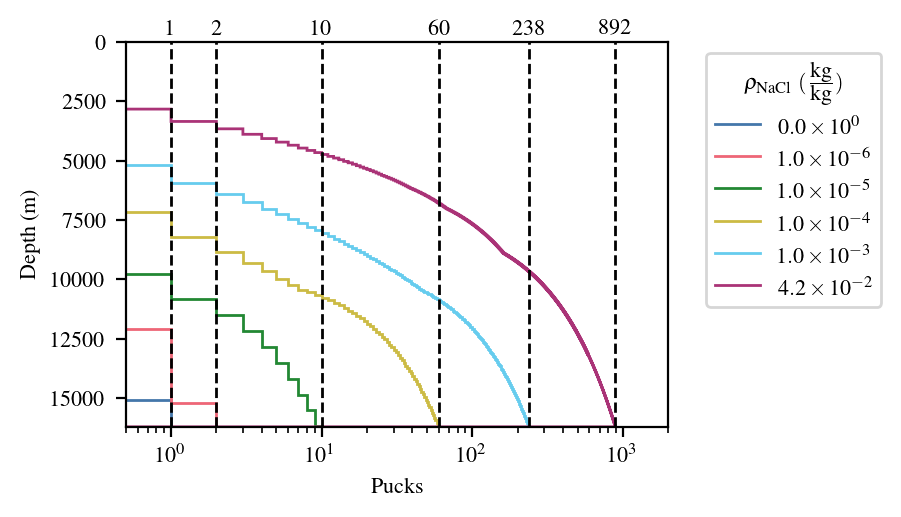

In [153]:
# Data from the dataset
max_depth = 16200  # Maximum value for the vertical line

# Create the plot
fig = plt.figure(figsize=(3.5,2.5))

dfs = [
    lb_ao_rho_salt0_df,
    lb_ao_rho_salt1e6_df,
    lb_ao_rho_salt1e5_df,
    lb_ao_rho_salt1e4_df,
    lb_ao_rho_salt1e3_df,
    lb_ao_rho_salt4p2e2_df]
labels = [
    r'$0.0\times10^{0}$',  
    r'$1.0\times10^{-6}$', 
    r'$1.0\times10^{-5}$', 
    r'$1.0\times10^{-4}$', 
    r'$1.0\times10^{-3}$', 
    r'$4.2\times10^{-2}$']

i = 0
# previous_y = 0
for label, df, color, pattern, label in zip(labels, dfs, 
    ['#4477AA', '#EE6677', '#228833', '#CCBB44', '#66CCEE', '#AA3377', 'black'], 
    ['-', '--', ':', '-.', '-', '--', ':'], labels):

    depths = df['Placement Depth (m)']
    plt.stairs(df.index[:-1], depths, label=label, 
        orientation='horizontal', color=color, linestyle='-')
    plt.axvline(x=df.index[-2], color='black', linestyle='--')
    plt.text(df.index[-2], -100, f'{df.index[-2]}', color='black', 
             va='bottom', ha='center', fontsize=8)
    i += 1

plt.ylabel('Depth (m)')
plt.ylim(max_depth, 0)

plt.xscale('log')
plt.xlim(0.5, 2e3)
plt.xlabel('Pucks')
plt.legend(title=r'$\rho_{\rm{NaCl}}$ $(\frac{\textrm{kg}}{\textrm{kg}})$', bbox_to_anchor=(1.05, 1), loc='upper left')
# Show the plot
plt.show()

In [162]:
df = pd.read_csv(folder + 'puck_placements_high_band_sub jovian point10000p0sc_txpwr1_porosity0p1_saltfraction0p0e+00.csv')
any(df.index[:-2])


False

low_band


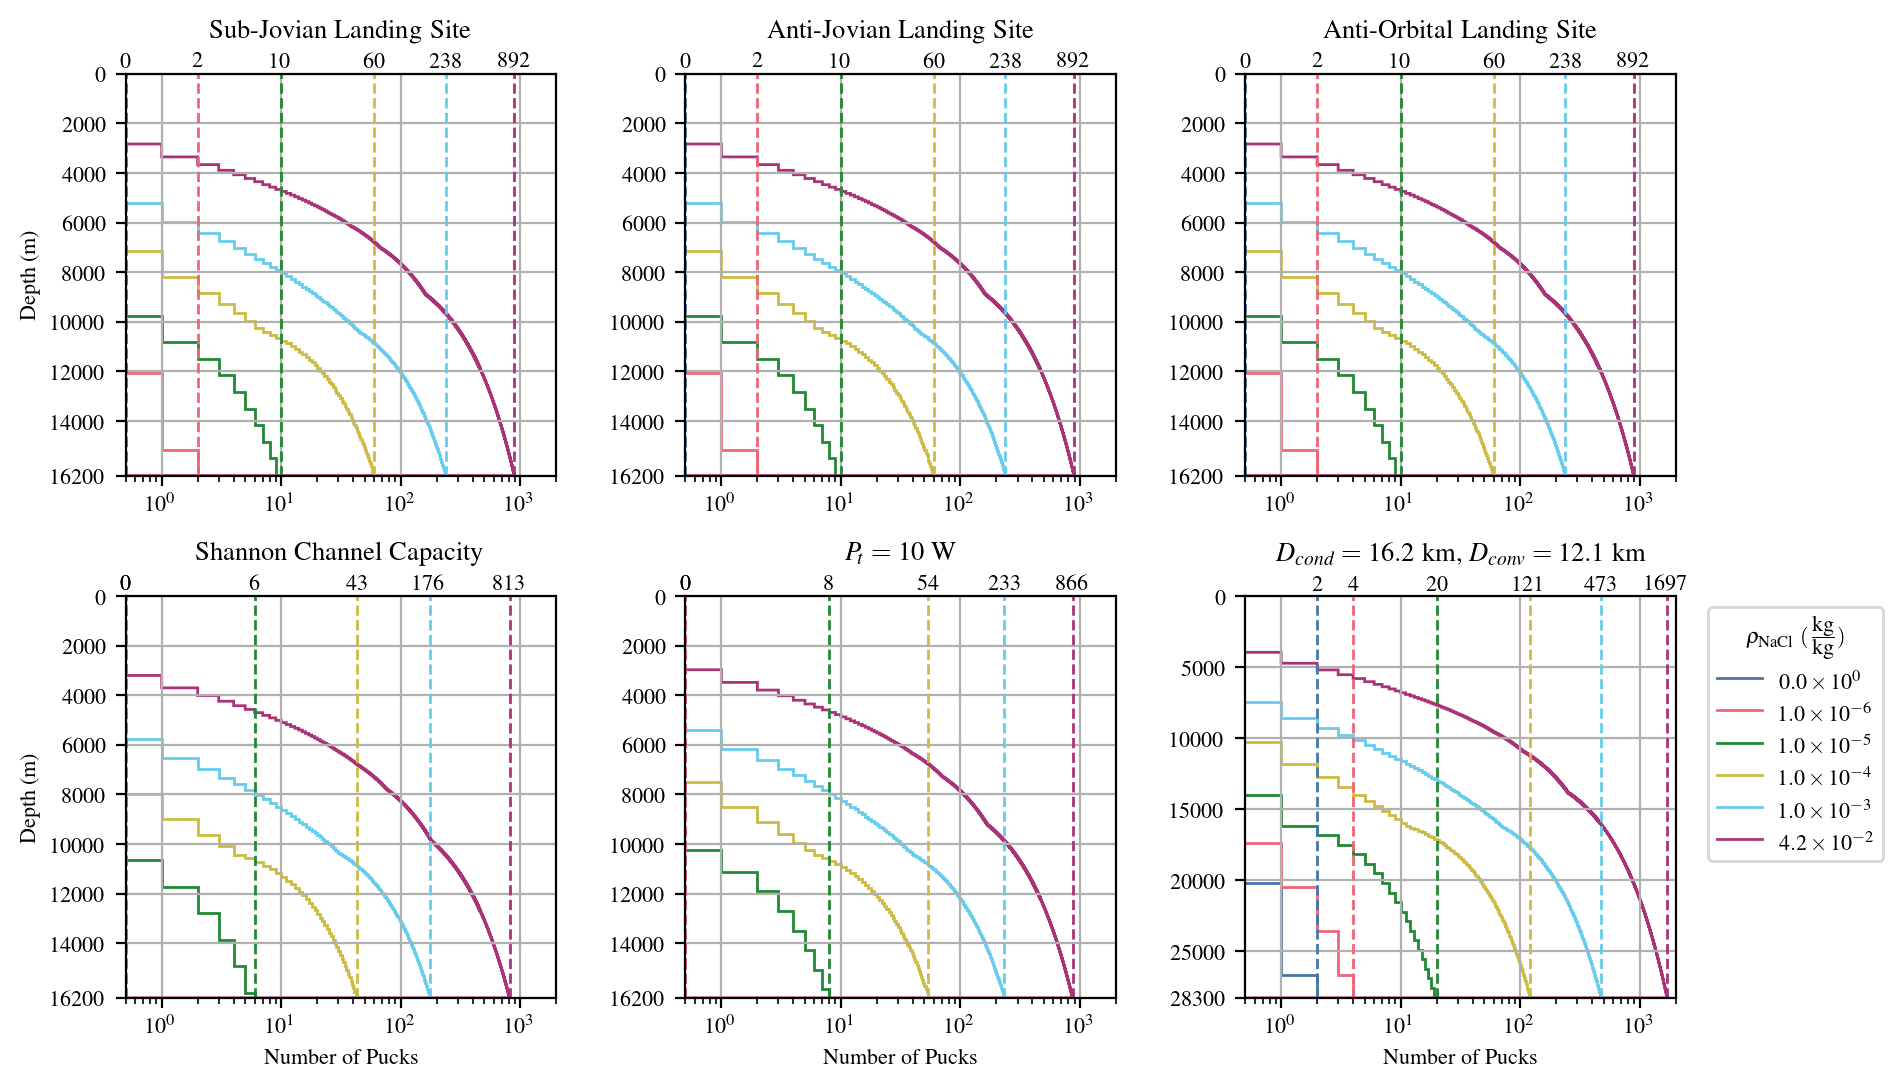

high_band


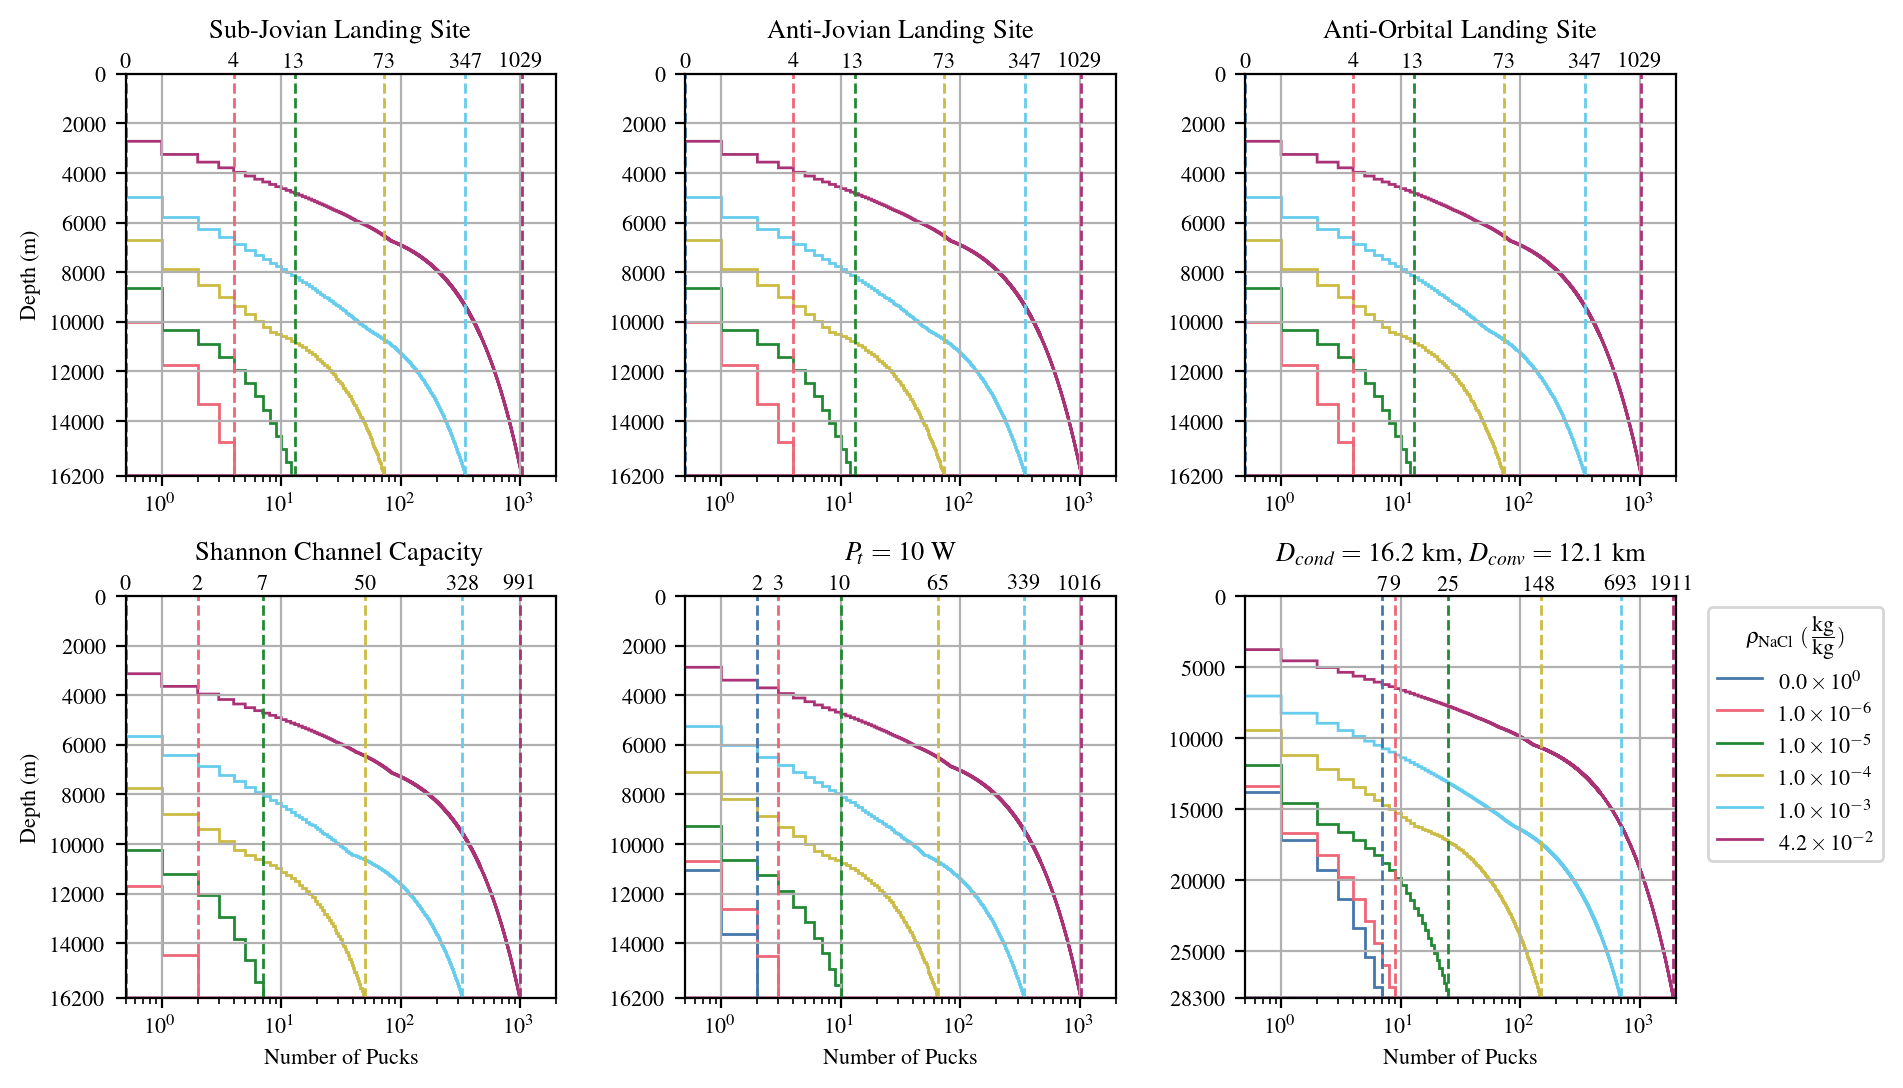

In [165]:
for band in ['low_band', 'high_band']:
    print(band)
    fig = plt.figure(figsize=(10, 6))
    num_y_plots = 2
    width_ratios = [2, 2, 2]
    num_x_plots = len(width_ratios)
    number_of_plots = num_y_plots * num_x_plots
    gs = GridSpec(num_y_plots, num_x_plots, width_ratios=width_ratios, wspace=0.3, hspace=0.3)

    positions = [(int(i / num_x_plots), (i % num_x_plots)) for i in range(number_of_plots)]

    axs = []
    for pos in positions:
        temp_ax = fig.add_subplot(gs[pos[0], pos[1]])
        axs.append(temp_ax)

    axs = np.array(axs)
    ax = np.reshape(axs, (num_y_plots, num_x_plots))

    # Custom legend for colors
    color_cycler=['C0', 'C1', 'C2', 'C3', 'C4', 'C5']
    color_legend = [Line2D([0], [0], color=c, lw=1) for c in color_cycler]
    color_labels = [
        r'$0.0\times10^{0}$',  
        r'$1.0\times10^{-6}$', 
        r'$1.0\times10^{-5}$', 
        r'$1.0\times10^{-4}$', 
        r'$1.0\times10^{-3}$', 
        r'$4.2\times10^{-2}$']

    landing_site = 'sub jovian point'
    comm_bw = 10e3
    scl_string = 'sc'
    tx_pwr = 1
    eta_vac = 0.1
    max_D_cond = 10.4e3 + 5.8e3
    max_D_conv = 5.8e3 + 6.3e3
    text_offset = -100
    xlim = (0.5, 2e3)
    sub_title_offset = 1.05
    yticks_to_set = [0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.,
            14000., 16200.]
    yticks_to_set_on_max = [0.,  5000., 10000., 15000., 
            20000., 25000., 28300.]

    def file_suffix_constructor(landing_site, comm_bw, scl_string, tx_pwr, eta_vac, rho_salt):
        return f"{landing_site}{comm_bw}{scl_string}_txpwr{tx_pwr}_porosity{eta_vac}_saltfraction{rho_salt:.1e}".replace('.', 'p') 

    i = 0
    for rho_salt in [0, 1e-6, 1e-5, 1e-4, 1e-3, 4.2e-2]:
        for location, title, landing_site, in [
            ((0, 0), 'Sub-Jovian Landing Site', 'sub jovian point'),
            ((0, 1), 'Anti-Jovian Landing Site', 'anti jovian point'), 
            ((0, 2), 'Anti-Orbital Landing Site', 'anti orbital point')]:
            file_suffix = file_suffix_constructor(landing_site, comm_bw, scl_string, tx_pwr, eta_vac, rho_salt)
            df = pd.read_csv(folder + f'puck_placements_{band}_' + file_suffix + '.csv')
            ax[location].set_title(title, y=sub_title_offset)
            if any(df.index[:-2]):
                ax[location].stairs(df.index[:-1], df['Placement Depth (m)'], orientation='horizontal', color=color_cycler[i])
                ax[location].axvline(x=df.index[-2], linestyle='--', color=color_cycler[i])
                ax[location].text(df.index[-2], text_offset, f'{df.index[-2]}', color='black', 
                        va='bottom', ha='center', fontsize=8)
            else:
                ax[location].axvline(x=xlim[0], linestyle='--', color=color_cycler[i])
                ax[location].text(xlim[0], text_offset, f'{0}', color='black', 
                        va='bottom', ha='center', fontsize=8)
            ax[location].set_yticks(yticks_to_set)
            ax[location].set_ylim(yticks_to_set[-1], yticks_to_set[0])
        

        scl_string = 'sc'
        location = (1, 0)
        file_suffix = file_suffix_constructor(landing_site, comm_bw, scl_string, tx_pwr, eta_vac, rho_salt)
        df = pd.read_csv(folder + f'puck_placements_{band}_' + file_suffix + '.csv')
        ax[location].set_title('Shannon Channel Capacity', y=sub_title_offset)
        if any(df.index[:-2]):
            ax[location].stairs(df.index[:-1], df['Placement Depth (m)'], orientation='horizontal', color=color_cycler[i])
            ax[location].axvline(x=df.index[-2], linestyle='--', color=color_cycler[i])
            ax[location].text(df.index[-2], text_offset, f'{df.index[-2]}', color='black', 
                    va='bottom', ha='center', fontsize=8)
        else:
            ax[location].axvline(x=xlim[0], linestyle='--', color=color_cycler[i])
            ax[location].text(xlim[0], text_offset, f'{0}', color='black', 
                    va='bottom', ha='center', fontsize=8)
        ax[location].set_yticks(yticks_to_set)
        ax[location].set_ylim(yticks_to_set[-1], yticks_to_set[0])
        scl_string = ''

        tx_pwr = 10
        location = (1, 1)
        file_suffix = file_suffix_constructor(landing_site, comm_bw, scl_string, tx_pwr, eta_vac, rho_salt)
        df = pd.read_csv(folder + f'puck_placements_{band}_' + file_suffix + '.csv')
        ax[location].set_title(r'$P_t = 10$ W', y=sub_title_offset)
        if any(df.index[:-2]):
            ax[location].stairs(df.index[:-1], df['Placement Depth (m)'], orientation='horizontal', color=color_cycler[i])
            ax[location].axvline(x=df.index[-2], linestyle='--', color=color_cycler[i])
            ax[location].text(df.index[-2], text_offset, f'{df.index[-2]}', color='black', 
                    va='bottom', ha='center', fontsize=8)
        else:
            ax[location].axvline(x=xlim[0], linestyle='--', color=color_cycler[i])
            ax[location].text(xlim[0], text_offset, f'{0}', color='black', 
                    va='bottom', ha='center', fontsize=8)
        ax[location].set_yticks(yticks_to_set)
        ax[location].set_ylim(yticks_to_set[-1], yticks_to_set[0])
        tx_pwr = 1

        # if rho_salt in [0, 1e-3, 4.2e-2]:
        location = (1, 2)
        file_suffix = f"{landing_site}{comm_bw}{scl_string}_{max_D_conv}_{max_D_conv}_txpwr{tx_pwr}_porosity{eta_vac}_saltfraction{rho_salt:.1e}".replace('.', 'p') 
        df = pd.read_csv(folder + f'puck_placements_{band}_' + file_suffix + '.csv')
        ax[location].set_title(r'$D_{cond}=16.2\textrm{ km}$, $D_{conv}=12.1\textrm{ km}$', y=sub_title_offset)
        if any(df.index[:-2]):
            ax[location].stairs(df.index[:-1], df['Placement Depth (m)'], orientation='horizontal', color=color_cycler[i])
            ax[location].axvline(x=df.index[-2], linestyle='--', color=color_cycler[i])
            ax[location].text(df.index[-2], text_offset, f'{df.index[-2]}', color='black', 
                    va='bottom', ha='center', fontsize=8)
        else:
            ax[location].axvline(x=xlim[0], linestyle='--', color=color_cycler[i])
            ax[location].text(xlim[0], text_offset, f'{0}', color='black', 
                    va='bottom', ha='center', fontsize=8)
        ax[location].set_yticks(yticks_to_set_on_max)
        ax[location].set_ylim(yticks_to_set_on_max[-1], yticks_to_set_on_max[0])
        
        i+=1

    ax[0, 0].set_ylabel('Depth (m)')
    ax[1, 0].set_ylabel('Depth (m)')
    ax[1, 0].set_xlabel('Number of Pucks')
    ax[1, 1].set_xlabel('Number of Pucks')
    ax[1, 2].set_xlabel('Number of Pucks')

    # Create a combined legend with color and linestyle legends
    plt.legend(color_legend, color_labels, title=r'$\rho_{\rm{NaCl}}$ $(\frac{\textrm{kg}}{\textrm{kg}})$', bbox_to_anchor=(1.05, 1), loc='upper left')


    for i in np.arange(number_of_plots):
        axs[i].grid(True)
        axs[i].set_xscale('log')
        axs[i].set_xlim(xlim)
        # if i != 0 and i != num_x_plots:
        #     axs[i].set_yticklabels([])
        # if i==num_x_plots-1 or i==number_of_plots-1:
        #     axs[i].axis('off')
    plt.show()

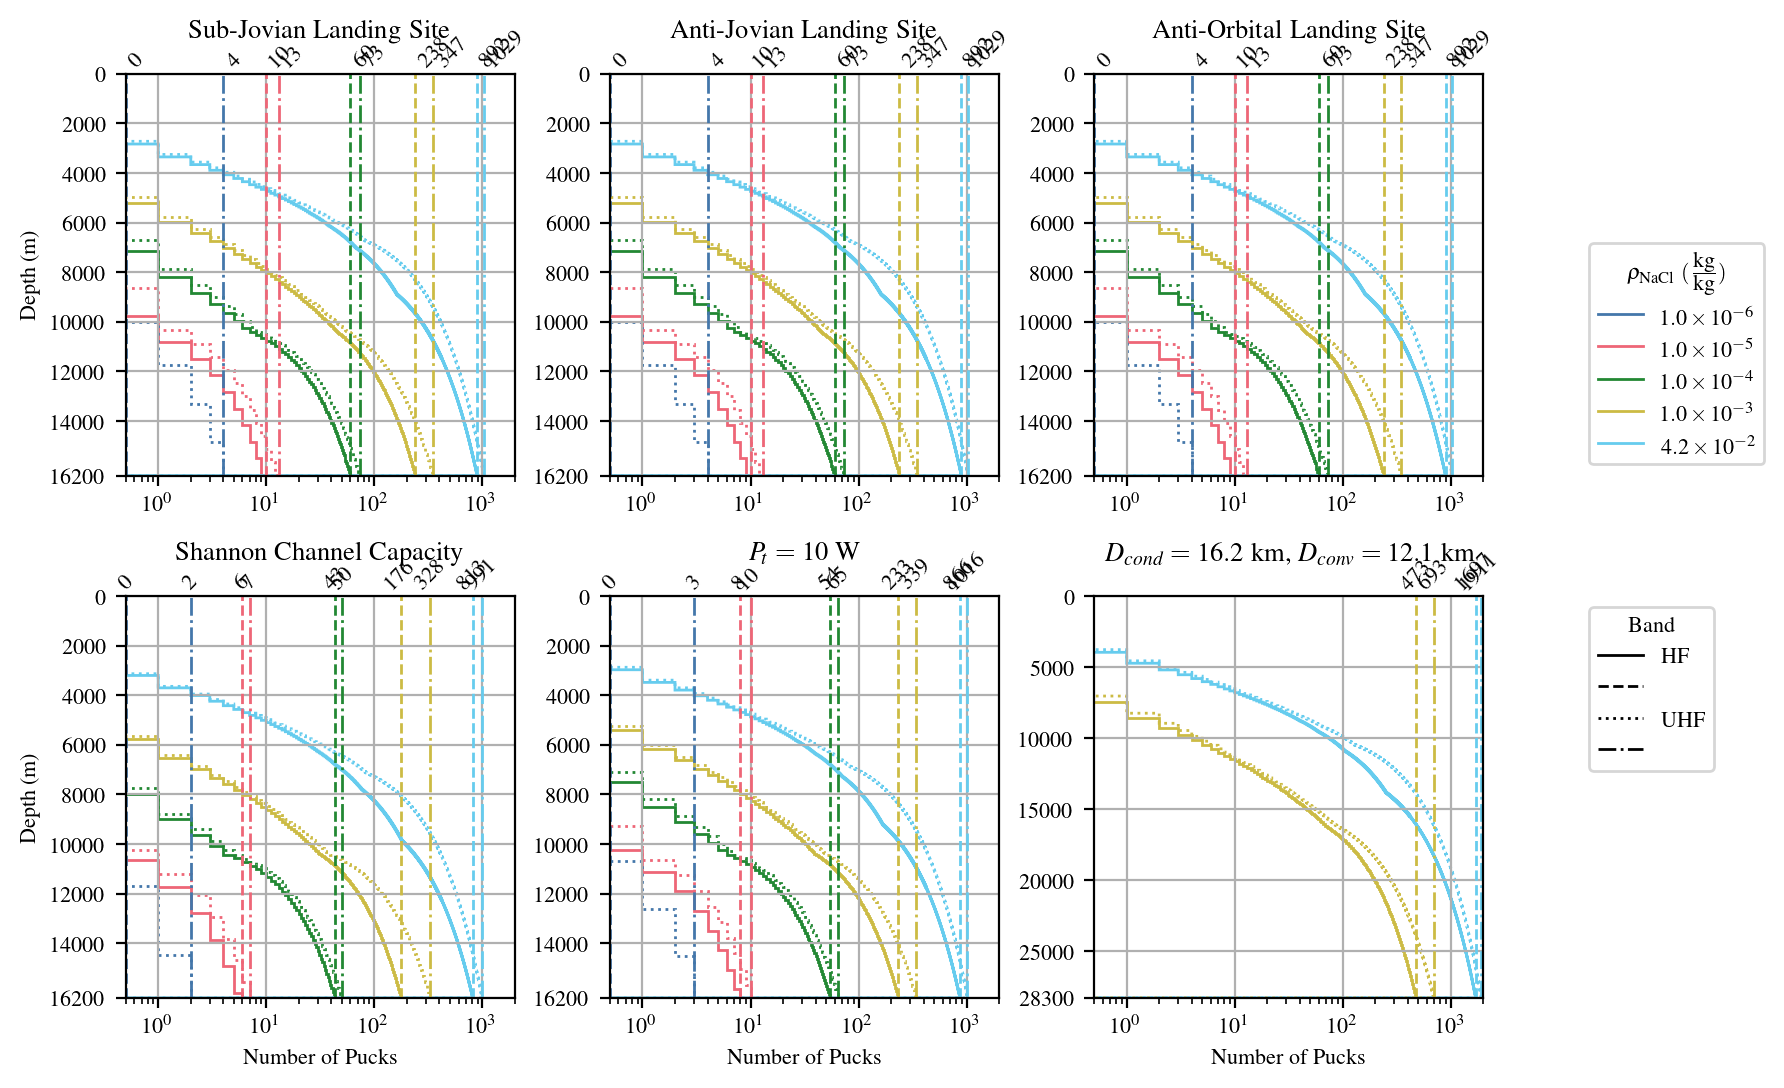

In [145]:


fig = plt.figure(figsize=(10, 6))
num_y_plots = 2
width_ratios = [2, 2, 2, 0.5]
num_x_plots = len(width_ratios)
number_of_plots = num_y_plots * num_x_plots
gs = GridSpec(num_y_plots, num_x_plots, width_ratios=width_ratios, wspace=0.3, hspace=0.3)

positions = [(int(i / num_x_plots), (i % num_x_plots)) for i in range(number_of_plots)]

axs = []
for pos in positions:
    temp_ax = fig.add_subplot(gs[pos[0], pos[1]])
    axs.append(temp_ax)

axs = np.array(axs)
ax = np.reshape(axs, (num_y_plots, num_x_plots))

# Custom legend for colors
color_cycler=['C0', 'C1', 'C2', 'C3', 'C4', 'C5']
color_legend = [Line2D([0], [0], color=c, lw=1) for c in color_cycler]
color_labels = [
    r'$1.0\times10^{-6}$', 
    r'$1.0\times10^{-5}$', 
    r'$1.0\times10^{-4}$', 
    r'$1.0\times10^{-3}$', 
    r'$4.2\times10^{-2}$']

# Custom legend for linestyles
linestyle_cycler=['-', '--', ':', '-.']
linestyle_legend = [Line2D([0], [0], color='black', lw=1, linestyle=ls) for ls in linestyle_cycler]
linestyle_labels = ['HF', '', 'UHF', '']

landing_site = 'sub jovian point'
comm_bw = 10e3
scl_string = 'sc'
tx_pwr = 1
eta_vac = 0.1
max_D_cond = 10.4e3 + 5.8e3
max_D_conv = 5.8e3 + 6.3e3
text_offset = -100
xlim = (0.5, 2e3)
sub_title_offset = 1.05
yticks_to_set = [0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.,
        14000., 16200.]
yticks_to_set_on_max = [0.,  5000., 10000., 15000., 
        20000., 25000., 28300.]

def file_suffix_constructor(landing_site, comm_bw, scl_string, tx_pwr, eta_vac, rho_salt):
    return f"{landing_site}{comm_bw}{scl_string}_txpwr{tx_pwr}_porosity{eta_vac}_saltfraction{rho_salt:.1e}".replace('.', 'p') 

j = 0
for band in ['low_band', 'high_band']:
    i=0
    linestyle_plot_line = linestyle_cycler[j]
    linestyle_vline = linestyle_cycler[j+1]
    for rho_salt in [1e-6, 1e-5, 1e-4, 1e-3, 4.2e-2]:
        for location, title, landing_site, in [
            ((0, 0), 'Sub-Jovian Landing Site', 'sub jovian point'),
            ((0, 1), 'Anti-Jovian Landing Site', 'anti jovian point'), 
            ((0, 2), 'Anti-Orbital Landing Site', 'anti orbital point')]:
            file_suffix = file_suffix_constructor(landing_site, comm_bw, scl_string, tx_pwr, eta_vac, rho_salt)
            df = pd.read_csv(folder + f'puck_placements_{band}_' + file_suffix + '.csv')
            ax[location].set_title(title, y=sub_title_offset)
            if any(df.index[:-2]):
                ax[location].stairs(df.index[:-1], df['Placement Depth (m)'], orientation='horizontal', color=color_cycler[i], linestyle=linestyle_plot_line)
                ax[location].axvline(x=df.index[-2], linestyle=linestyle_vline, color=color_cycler[i])
                ax[location].text(df.index[-2], text_offset, f'{df.index[-2]}', color='black', rotation=45, 
                        va='bottom', ha='left', fontsize=8)
            else:
                ax[location].axvline(x=xlim[0], linestyle=linestyle_vline, color=color_cycler[i])
                ax[location].text(xlim[0], text_offset, f'{0}', color='black', rotation=45,
                        va='bottom', ha='left', fontsize=8)
            ax[location].set_yticks(yticks_to_set)
            ax[location].set_ylim(yticks_to_set[-1], yticks_to_set[0])
        

        scl_string = 'sc'
        location = (1, 0)
        file_suffix = file_suffix_constructor(landing_site, comm_bw, scl_string, tx_pwr, eta_vac, rho_salt)
        df = pd.read_csv(folder + f'puck_placements_{band}_' + file_suffix + '.csv')
        ax[location].set_title('Shannon Channel Capacity', y=sub_title_offset)
        if any(df.index[:-2]):
            ax[location].stairs(df.index[:-1], df['Placement Depth (m)'], orientation='horizontal', color=color_cycler[i], linestyle=linestyle_plot_line)
            ax[location].axvline(x=df.index[-2], linestyle=linestyle_vline, color=color_cycler[i])
            ax[location].text(df.index[-2], text_offset, f'{df.index[-2]}', color='black', rotation=45,
                    va='bottom', ha='center', fontsize=8)
        else:
            ax[location].axvline(x=xlim[0], linestyle=linestyle_vline, color=color_cycler[i])
            ax[location].text(xlim[0], text_offset, f'{0}', color='black', rotation=45,
                    va='bottom', ha='center', fontsize=8)
        ax[location].set_yticks(yticks_to_set)
        ax[location].set_ylim(yticks_to_set[-1], yticks_to_set[0])
        scl_string = ''

        tx_pwr = 10
        location = (1, 1)
        file_suffix = file_suffix_constructor(landing_site, comm_bw, scl_string, tx_pwr, eta_vac, rho_salt)
        df = pd.read_csv(folder + f'puck_placements_{band}_' + file_suffix + '.csv')
        ax[location].set_title(r'$P_t = 10$ W', y=sub_title_offset)
        if any(df.index[:-2]):
            ax[location].stairs(df.index[:-1], df['Placement Depth (m)'], orientation='horizontal', color=color_cycler[i], linestyle=linestyle_plot_line)
            ax[location].axvline(x=df.index[-2], linestyle=linestyle_vline, color=color_cycler[i])
            ax[location].text(df.index[-2], text_offset, f'{df.index[-2]}', color='black', rotation=45,
                    va='bottom', ha='center', fontsize=8)
        else:
            ax[location].axvline(x=xlim[0], linestyle=linestyle_vline, color=color_cycler[i])
            ax[location].text(xlim[0], text_offset, f'{0}', color='black', rotation=45,
                    va='bottom', ha='center', fontsize=8)
        ax[location].set_yticks(yticks_to_set)
        ax[location].set_ylim(yticks_to_set[-1], yticks_to_set[0])
        tx_pwr = 1

        if rho_salt in [0, 1e-3, 4.2e-2]:
            location = (1, 2)
            file_suffix = f"{landing_site}{comm_bw}{scl_string}_{max_D_conv}_{max_D_conv}_txpwr{tx_pwr}_porosity{eta_vac}_saltfraction{rho_salt:.1e}".replace('.', 'p') 
            df = pd.read_csv(folder + f'puck_placements_{band}_' + file_suffix + '.csv')
            ax[location].set_title(r'$D_{cond}=16.2\textrm{ km}$, $D_{conv}=12.1\textrm{ km}$', y=sub_title_offset)
            if any(df.index[:-2]):
                ax[location].stairs(df.index[:-1], df['Placement Depth (m)'], orientation='horizontal', color=color_cycler[i], linestyle=linestyle_plot_line)
                ax[location].axvline(x=df.index[-2], linestyle=linestyle_vline, color=color_cycler[i])
                ax[location].text(df.index[-2], text_offset, f'{df.index[-2]}', color='black', rotation=45,
                        va='bottom', ha='center', fontsize=8)
            else:
                ax[location].axvline(x=xlim[0], linestyle=linestyle_vline, color=color_cycler[i])
                ax[location].text(xlim[0], text_offset, f'{0}', color='black', rotation=45,
                        va='bottom', ha='center', fontsize=8)
            ax[location].set_yticks(yticks_to_set_on_max)
            ax[location].set_ylim(yticks_to_set_on_max[-1], yticks_to_set_on_max[0])
        
        i+=1
    j+=2

ax[0, 0].set_ylabel('Depth (m)')
ax[1, 0].set_ylabel('Depth (m)')
ax[1, 0].set_xlabel('Number of Pucks')
ax[1, 1].set_xlabel('Number of Pucks')
ax[1, 2].set_xlabel('Number of Pucks')

# Create a combined legend with color and linestyle legends
# Create a combined legend with color and linestyle legends
ax[0, num_x_plots-1].legend(color_legend, color_labels, title=r'$\rho_{\rm{NaCl}}$ $(\frac{\textrm{kg}}{\textrm{kg}})$', loc='lower left')
ax[1, num_x_plots-1].legend(linestyle_legend, linestyle_labels, title='Band', loc='upper left')

for i in np.arange(number_of_plots):
    axs[i].grid(True)
    axs[i].set_xscale('log')
    axs[i].set_xlim(xlim)
    # if i != 0 and i != num_x_plots:
    #     axs[i].set_yticklabels([])
    if i==num_x_plots-1 or i==number_of_plots-1:
        axs[i].axis('off')